# What's the best deal when it comes to floor count?

#### Data Science 410 BB
#### University of Washington Professional & Continuing Education

#### Homework 2: Exploring Multivariate Data
#### Leo Salemann, 1/18/18

## Introduction
In this notebook, we'll be looking at [Kaggle's King Country House Sales Data](https://www.kaggle.com/harlfoxem/housesalesprediction/data), splitting the data set by floor count, and looking for the best deals in terms of price, age, and condition.

## A bit of Prep Work
Load the data, require some libraries, nothing much to see here.

In [2]:
read.housing = function(file = 'kc_house_data.csv'){
  ## Read the csv file
  kc.housing <- read.csv(file, header = TRUE, 
                      stringsAsFactors = FALSE)
}

kc.housing = read.housing() 

In [3]:
options(repr.plot.width=8, repr.plot.height=8)
require(car)
require(ggplot2)

Loading required package: car
Loading required package: ggplot2


## Price and Availability
It's very easy to find one or two-story home for around \$500K or less, in mid-range condition. condition. Looking for quality? Stick with one-story, where its much easier to find condition 4 or 5.

Warning message:
“Removed 198 rows containing non-finite values (stat_bin).”Warning message:
“Removed 22 rows containing missing values (geom_bar).”

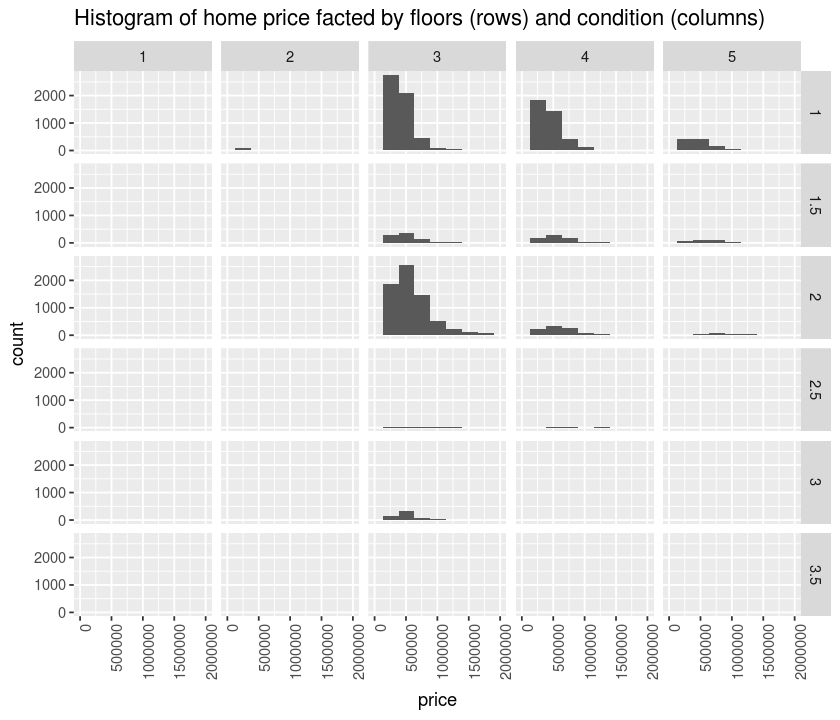

In [23]:
options(repr.plot.width=7, repr.plot.height=6)
bw1 = (max(kc.housing$price) - min(kc.housing$price))/30
ggplot(kc.housing, aes(price)) + 
geom_histogram(binwidth = bw1) + 
facet_grid(floors ~ condition) +
xlim(0, 2000000) +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
ggtitle('Histogram of home price facted by floors (rows) and condition (columns)')

## Age, Condition and Availability 
Looking to buy new? Your best bet is to go with the two-story homes. Three-story homes are almost guaranteed to be built after 2000, but there's comparatively fewer of them.

Do you want young or sturdy? Many of the new homes are only scoring mid-level condition. Better-condition homes are out there, if you consider those built in the second half of the twentieth century.

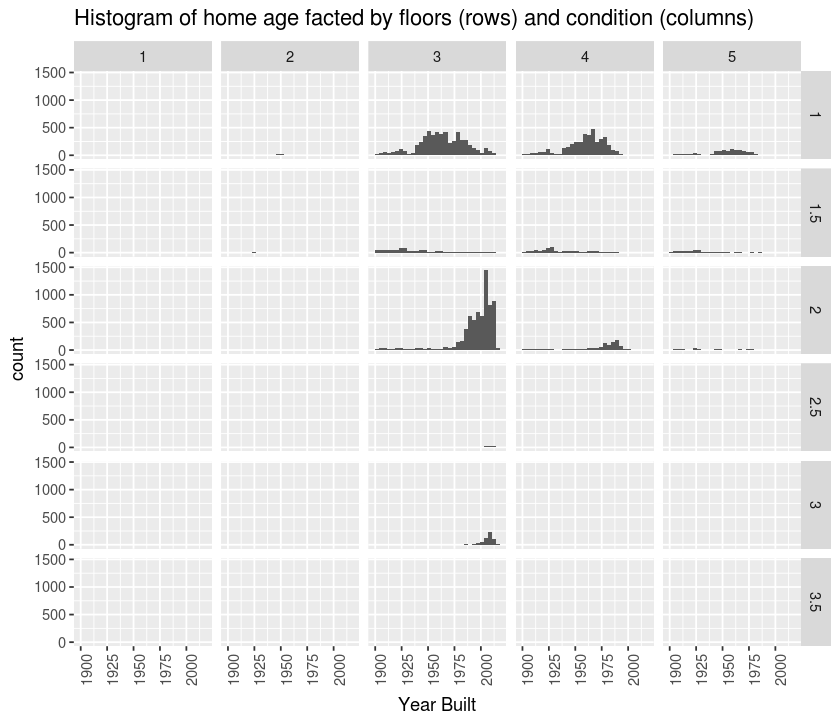

In [27]:
options(repr.plot.width=7, repr.plot.height=6)
bw1 = (max(kc.housing$yr_built) - min(kc.housing$yr_built))/30
ggplot(kc.housing, aes(yr_built)) + xlab('Year Built') +
geom_histogram(binwidth = bw1) + 
facet_grid(floors ~ condition) +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
ggtitle('Histogram of home age facted by floors (rows) and condition (columns)')

### Recent Renovations
First of all, it's important to note that the vast majority of houses in the dataset were never renovated. 

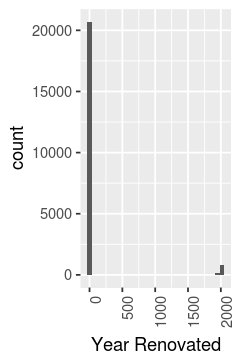

In [33]:
options(repr.plot.width=2, repr.plot.height=3)
bw1 = (max(kc.housing$yr_renovated) - min(kc.housing$yr_renovated))/30
ggplot(kc.housing, aes(yr_renovated)) + xlab('Year Renovated') +
geom_histogram(binwidth = bw1) + 
theme(axis.text.x = element_text(angle = 90, hjust = 1))


That said, if you really want to look for recent renovations, 2 and 2.5 story homes are your best bet.

Warning message:
“Removed 20700 rows containing non-finite values (stat_density).”

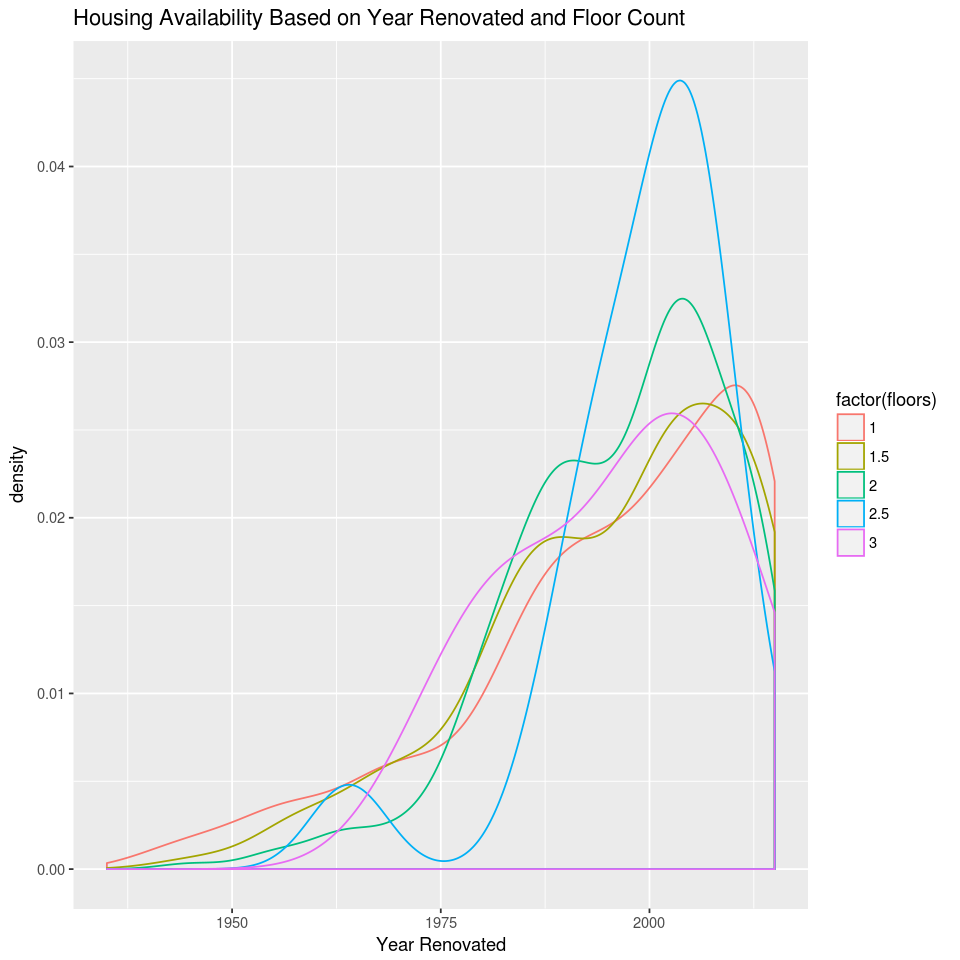

In [5]:
ggplot(kc.housing, aes(yr_renovated)) + 
xlim(c(1935, 2015)) + xlab('Year Renovated') +
geom_density(aes(color = factor(floors))) +
ggtitle('Housing Availability Based on Year Renovated and Floor Count')

# Conclusions

  * It's easy to find a one or two-story house for around \$500K or less. More low cost single-story homes are available, and tend to be in better condition than homes with more floors.
  * If you’re looking for new, look at 2-story homes. 
  * Renovations are rare, but when they do happen, they’re most likely to be found in 2 or 2.5 story homes, and will have happened after 2000.